[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Instance Segmentation on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Instance Segmentation, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Deploy the Trained Model to Roboflow

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Jul  2 12:48:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#check gpu
import torch

torch.cuda.is_available()

True

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Ubah direktori kerja
COLAB_PATH = "/content/drive/My Drive/"
os.chdir(COLAB_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd Skripsi

/content/drive/My Drive/Skripsi


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 6.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
%cd Skripsi

[Errno 2] No such file or directory: 'Skripsi'
/content/drive/My Drive/Skripsi


In [ ]:
!git clone github.com/ultralytics/ultralytics
%cd Skripsi
!pip install -e .

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://ik.imagekit.io/roboflow/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src=""
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 4: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [ ]:
'''%cd Skripsi

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="r3LTWUFrTAIdRCcPFQK3")
project = rf.workspace("skripsibaru").project("skripsi-new-svvt1")
version = project.version(1)
dataset = version.download("yolov8")'''

[Errno 2] No such file or directory: 'Skripsi'
/content/drive/MyDrive/Skripsi
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Skripsi-New-1 in yolov8:: 100%|██████████| 3370/3370 [00:25<00:00, 129.67it/s]


## Custom Training

#Percobaan 1



In [ ]:
%cd Skripsi

!yolo task=segment mode=train model=yolov8s-seg.pt data=SP1/data.yaml epochs=100 imgsz=640 imgsz=640 batch=16 lr0=0.001 lrf=0.001

[Errno 2] No such file or directory: 'Skripsi'
/content/drive/My Drive/Skripsi
New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=SP1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, s

In [ ]:
%cd Skripsi

[Errno 2] No such file or directory: 'Skripsi'
/content/drive/My Drive/Skripsi


In [ ]:
!ls runs/segment/train4/

args.yaml					    MaskF1_curve.png	 train_batch1.jpg
BoxF1_curve.png					    MaskP_curve.png	 train_batch2.jpg
BoxP_curve.png					    MaskPR_curve.png	 val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	 val_batch0_pred.jpg
BoxR_curve.png					    results.csv		 val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		 val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	 val_batch2_labels.jpg
events.out.tfevents.1719924765.287da41459b5.2491.0  train_batch1080.jpg  val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1081.jpg  weights
labels.jpg					    train_batch1082.jpg


In [ ]:
%cd Skripsi

[Errno 2] No such file or directory: 'Skripsi'
/content/drive/My Drive/Skripsi


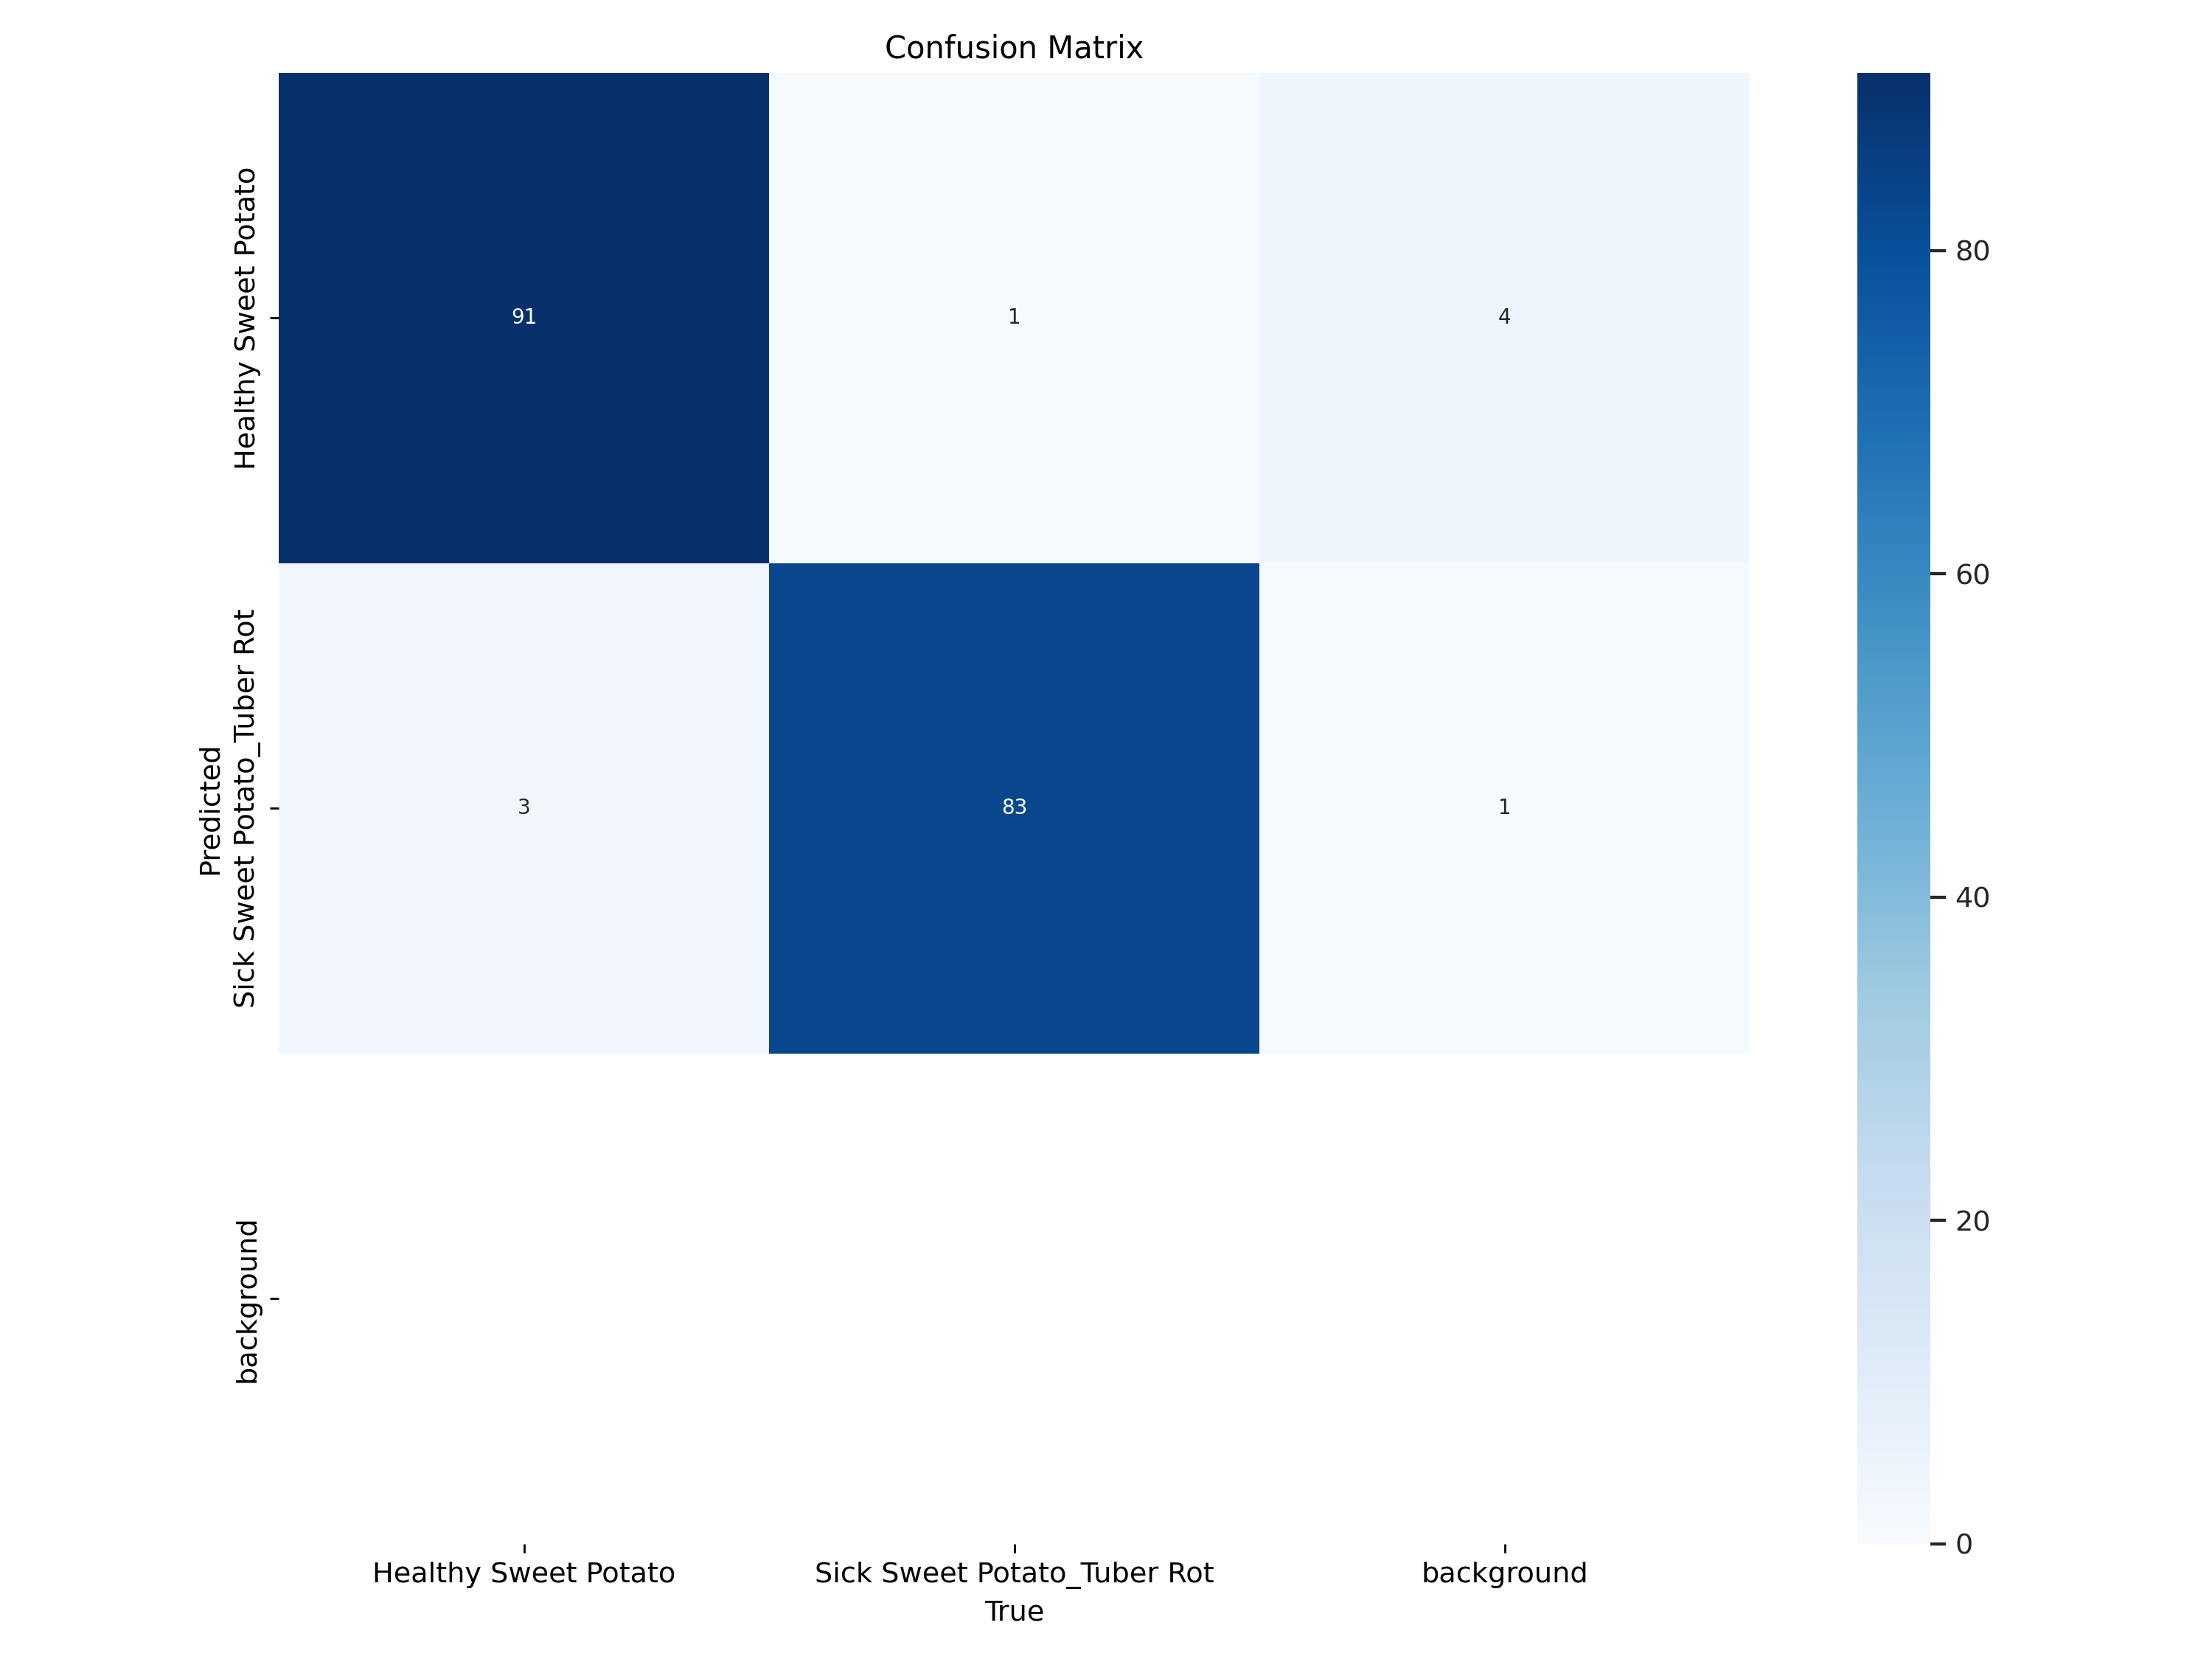

In [ ]:
Image(filename=f'runs/segment/train4/confusion_matrix.png', width=600)

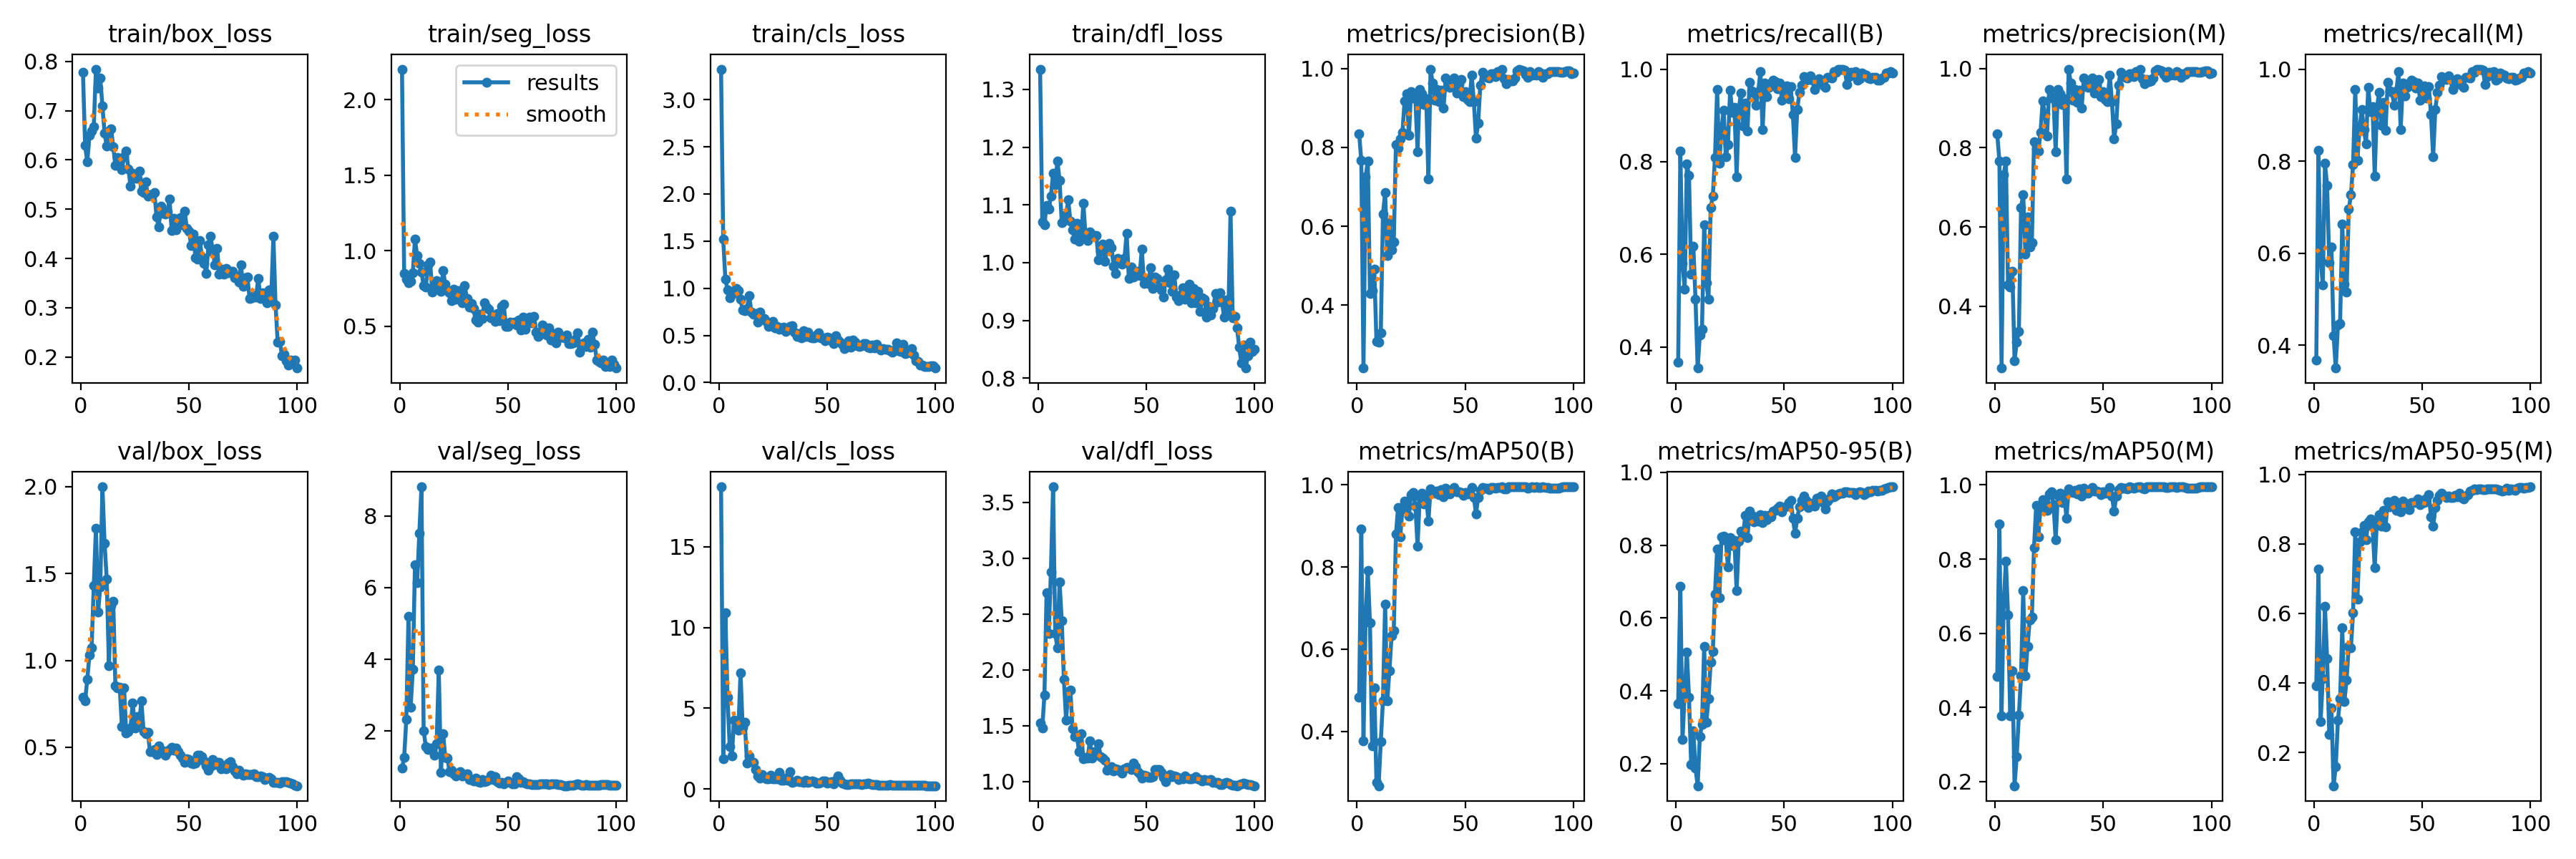

In [ ]:
Image(filename=f'runs/segment/train4/results.png', width=600)

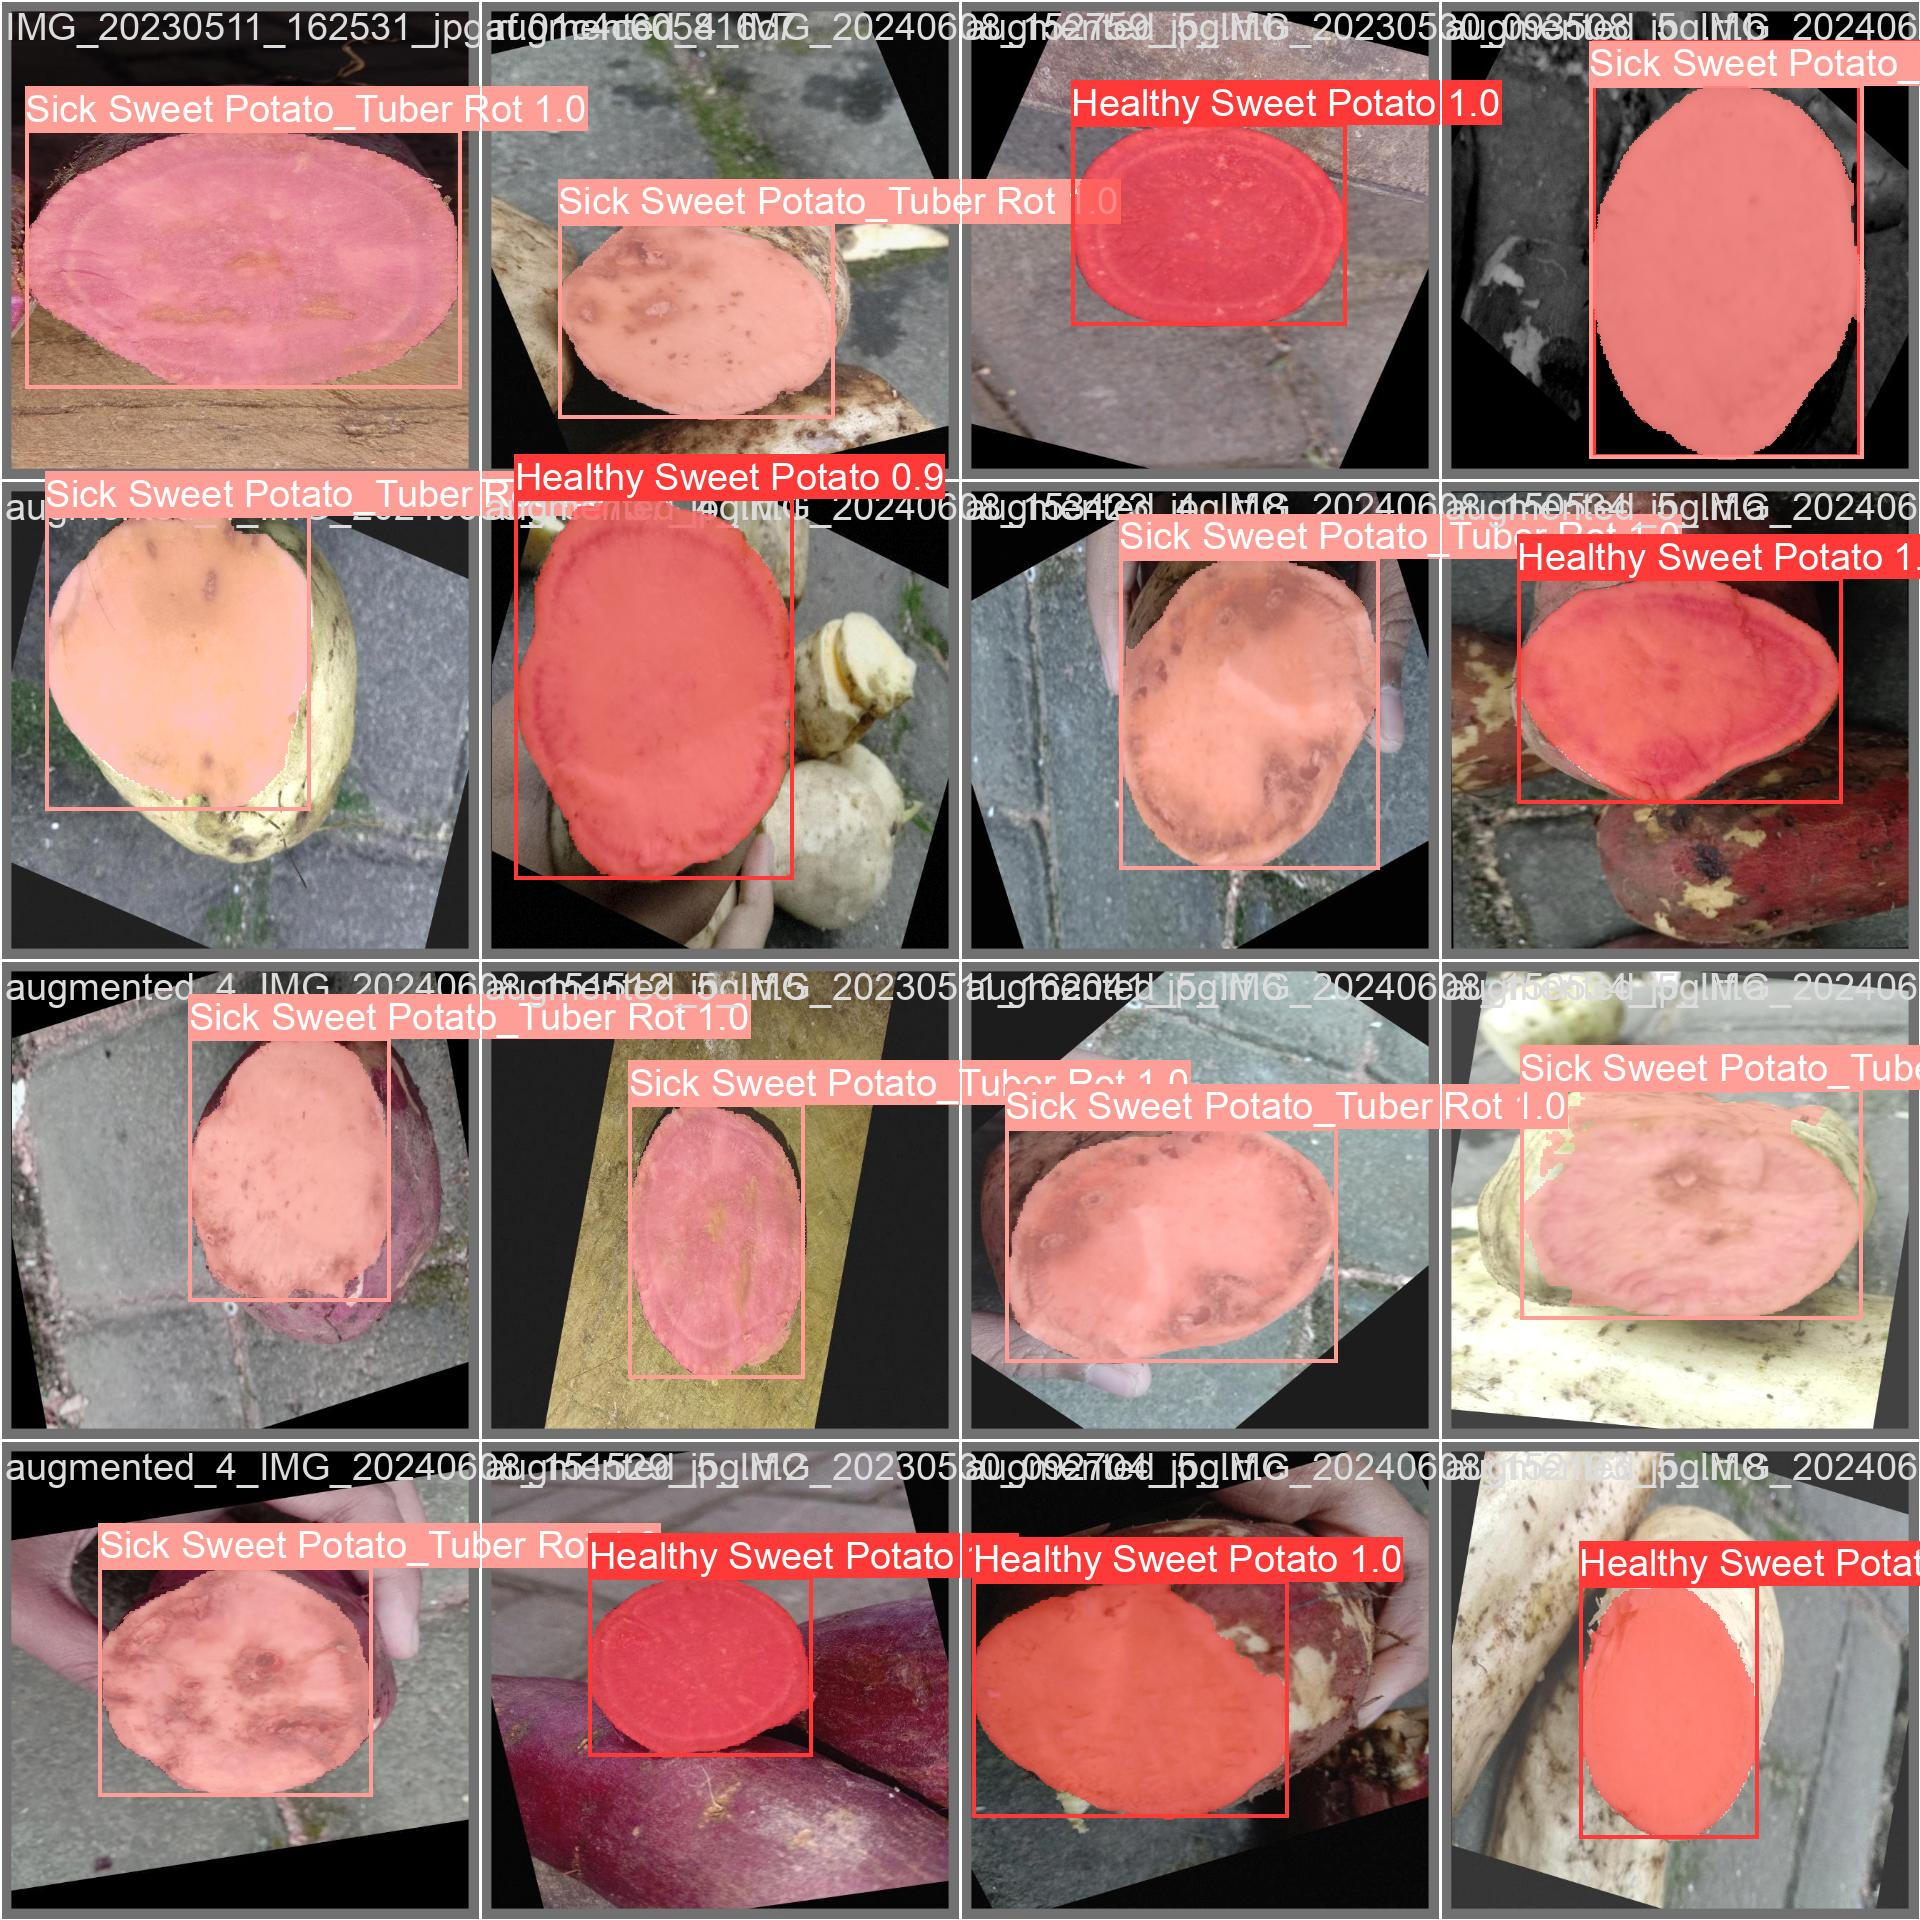

In [ ]:
Image(filename=f'runs/segment/train4/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd Skripsi

!yolo task=segment mode=val model=runs/segment/train4/weights/best.pt data=SP1/data.yaml

[Errno 2] No such file or directory: 'Skripsi'
/content/drive/My Drive/Skripsi
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/Skripsi/SP1/valid/labels.cache... 178 images, 0 backgrounds, 0 corrupt: 100% 178/178 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 12/12 [00:09<00:00,  1.22it/s]
                   all        178        178      0.989      0.993      0.994      0.962      0.989      0.993      0.994      0.964
  Healthy Sweet Potato        178         94      0.989      0.998      0.995      0.979      0.989      0.998      0.995      0.979
Sick Sweet Potato_Tuber Rot        178         84      0.988      0.988      0.994      0.944      0.988      0.988      0.994      0.948
Speed: 3.4ms preprocess, 16.6ms i

## Inference with Custom Model

In [ ]:
%cd Skripsi
!yolo task=segment mode=predict model=runs/segment/train4/weights/best.pt conf=0.25 source=SP1/test/images save=true

[Errno 2] No such file or directory: 'Skripsi'
/content/drive/My Drive/Skripsi
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1423 /content/drive/MyDrive/Skripsi/SP1/test/images/IMG_20230511_162041_jpg.rf.0ea7482df5ea9d4e2eaaa0c96e906a1a.jpg: 640x640 1 Sick Sweet Potato_Tuber Rot, 20.9ms
image 2/1423 /content/drive/MyDrive/Skripsi/SP1/test/images/IMG_20230511_162041_jpg.rf.8779466943701c11b8ee1ce14f19ccb7.jpg: 640x640 1 Healthy Sweet Potato, 1 Sick Sweet Potato_Tuber Rot, 20.9ms
image 3/1423 /content/drive/MyDrive/Skripsi/SP1/test/images/IMG_20230511_162041_jpg.rf.ff9d072b2f0ef2fc2983e7f5692deacc.jpg: 640x640 1 Sick Sweet Potato_Tuber Rot, 22.3ms
image 4/1423 /content/drive/MyDrive/Skripsi/SP1/test/images/IMG_20230511_162106_jpg.rf.ad2dd2ee42153ce86202a1d2a0818929.jpg: 640x640 1 Sick Sweet Potato_Tuber Rot, 21

In [ ]:
%cd Skripsi

[Errno 2] No such file or directory: 'Skripsi'
/content/drive/My Drive/Skripsi


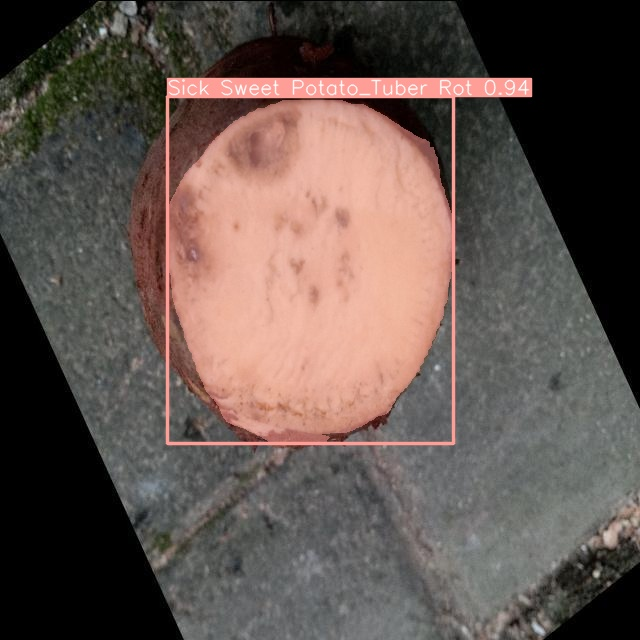

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict2/augmented_14_IMG_20240608_151456_jpg.rf.c39db2f8b33f35bba64e896051ff7d5f.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

#Percobaan 4


In [ ]:
%cd Skripsi

!yolo task=segment mode=train model=yolov8s-seg.pt data=SP4/data.yaml epochs=150 imgsz=640 imgsz=640 imgsz=640 batch=16 lr0=0.001 lrf=0.001

[Errno 2] No such file or directory: 'Skripsi'
/content/drive/My Drive/Skripsi
New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=SP1/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, s

In [ ]:
%cd Skripsi

[Errno 2] No such file or directory: 'Skripsi'
/content/drive/My Drive/Skripsi


In [ ]:
!ls runs/segment/train2/

args.yaml					     MaskF1_curve.png	  train_batch1.jpg
BoxF1_curve.png					     MaskP_curve.png	  train_batch2.jpg
BoxP_curve.png					     MaskPR_curve.png	  val_batch0_labels.jpg
BoxPR_curve.png					     MaskR_curve.png	  val_batch0_pred.jpg
BoxR_curve.png					     results.csv	  val_batch1_labels.jpg
confusion_matrix_normalized.png			     results.png	  val_batch1_pred.jpg
confusion_matrix.png				     train_batch0.jpg	  val_batch2_labels.jpg
events.out.tfevents.1719813824.f3bcad2f0d3d.18550.0  train_batch1680.jpg  val_batch2_pred.jpg
labels_correlogram.jpg				     train_batch1681.jpg  weights
labels.jpg					     train_batch1682.jpg


In [ ]:
%cd Skripsi

[Errno 2] No such file or directory: 'Skripsi'
/content/drive/My Drive/Skripsi


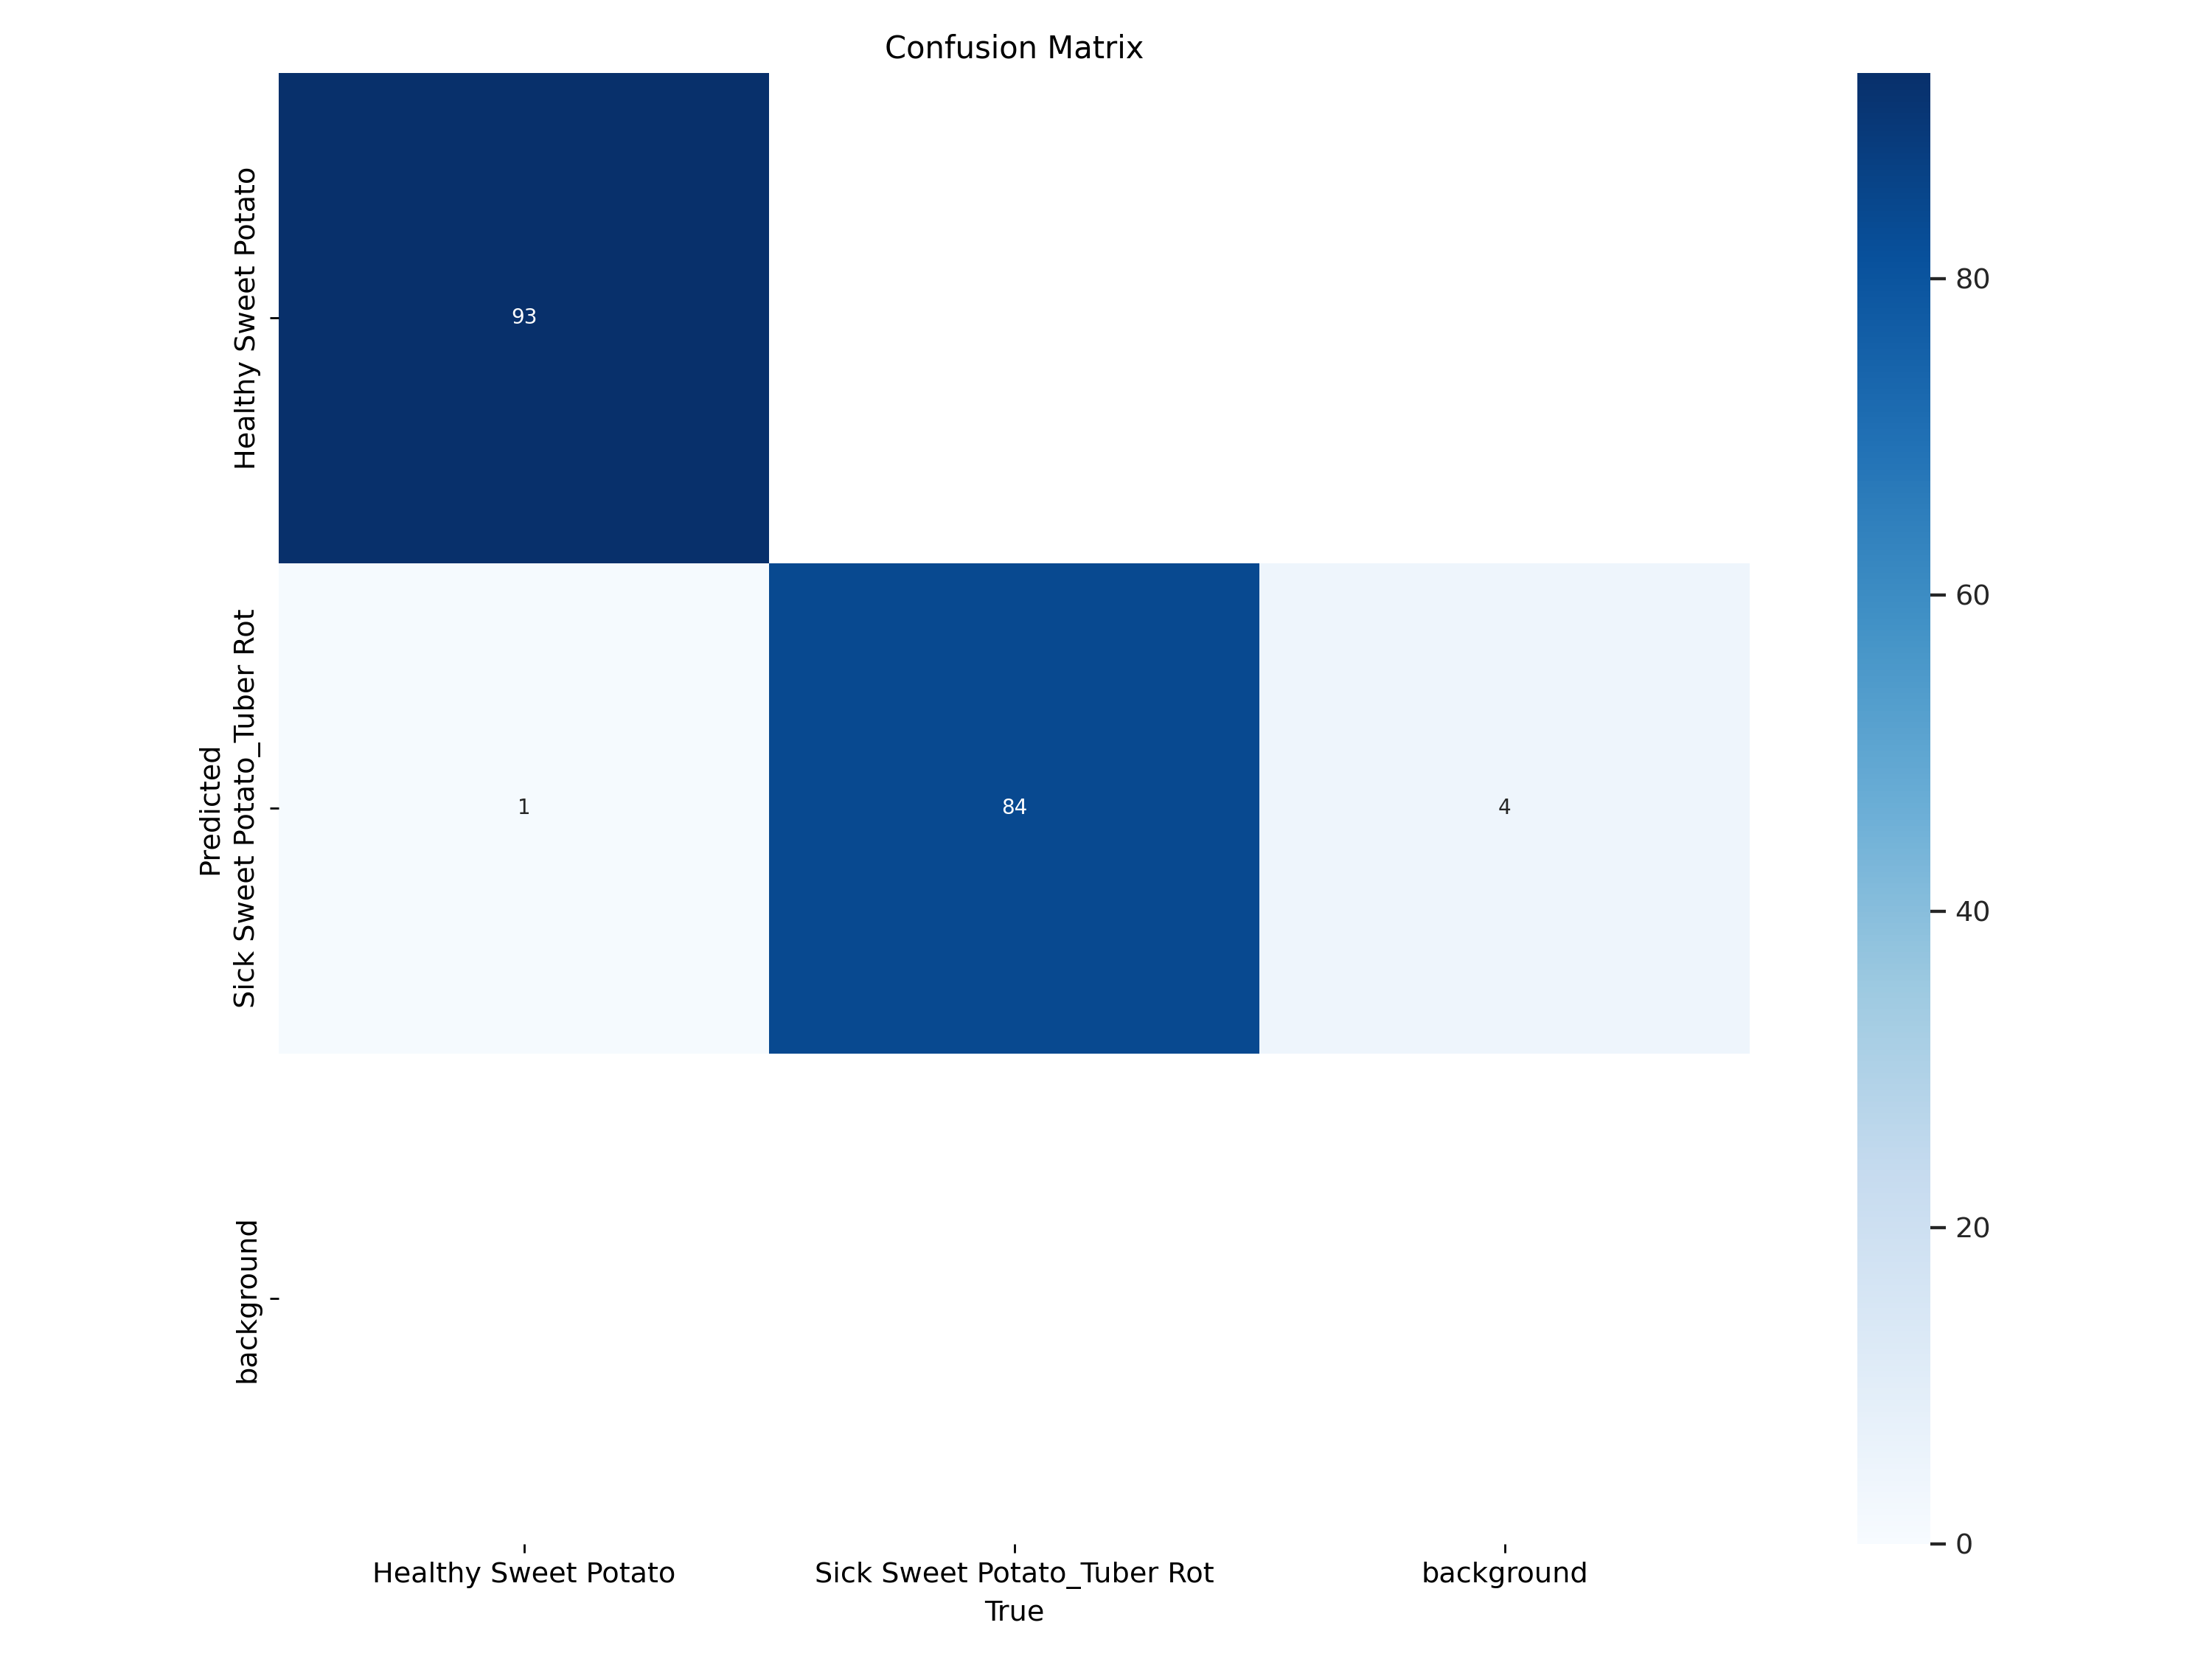

In [ ]:
Image(filename=f'runs/segment/train2/confusion_matrix.png', width=600)

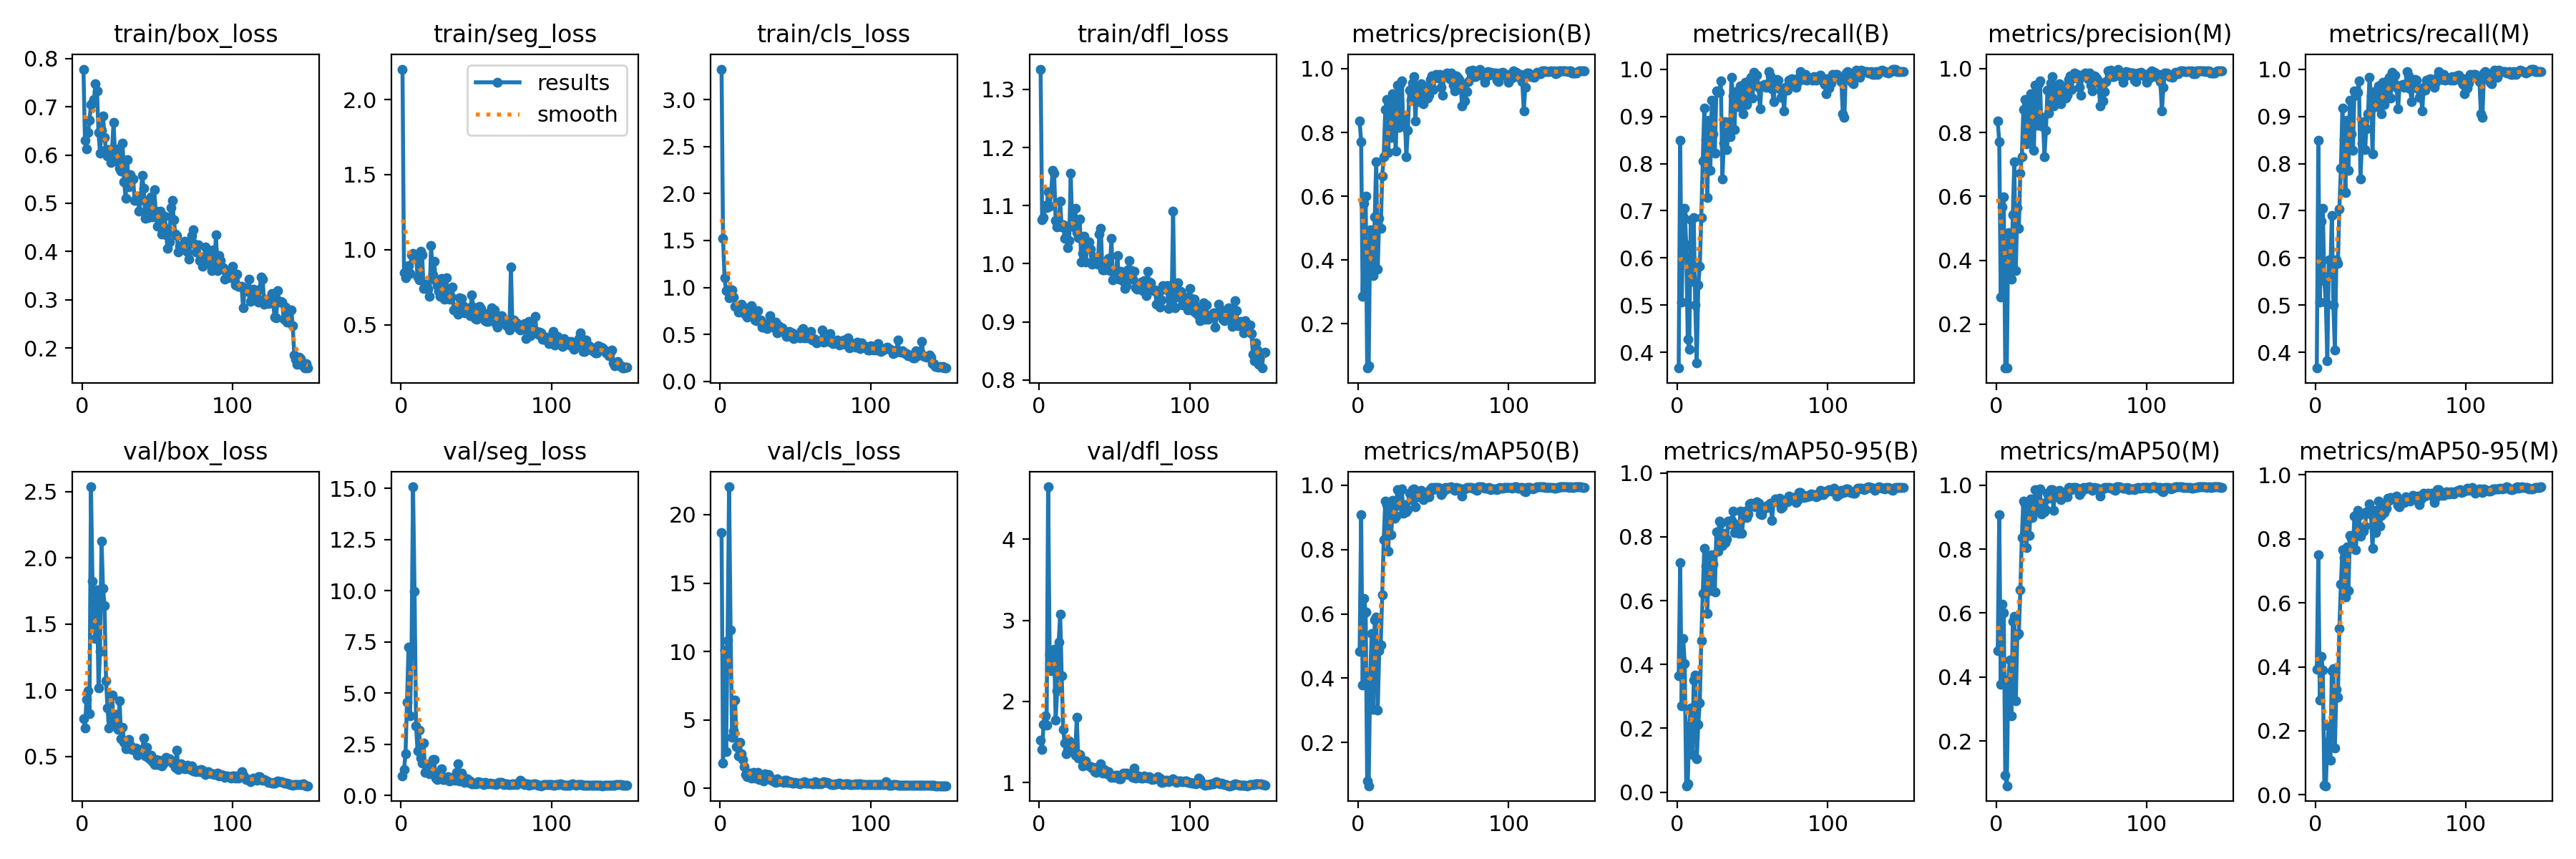

In [ ]:
Image(filename=f'runs/segment/train2/results.png', width=600)

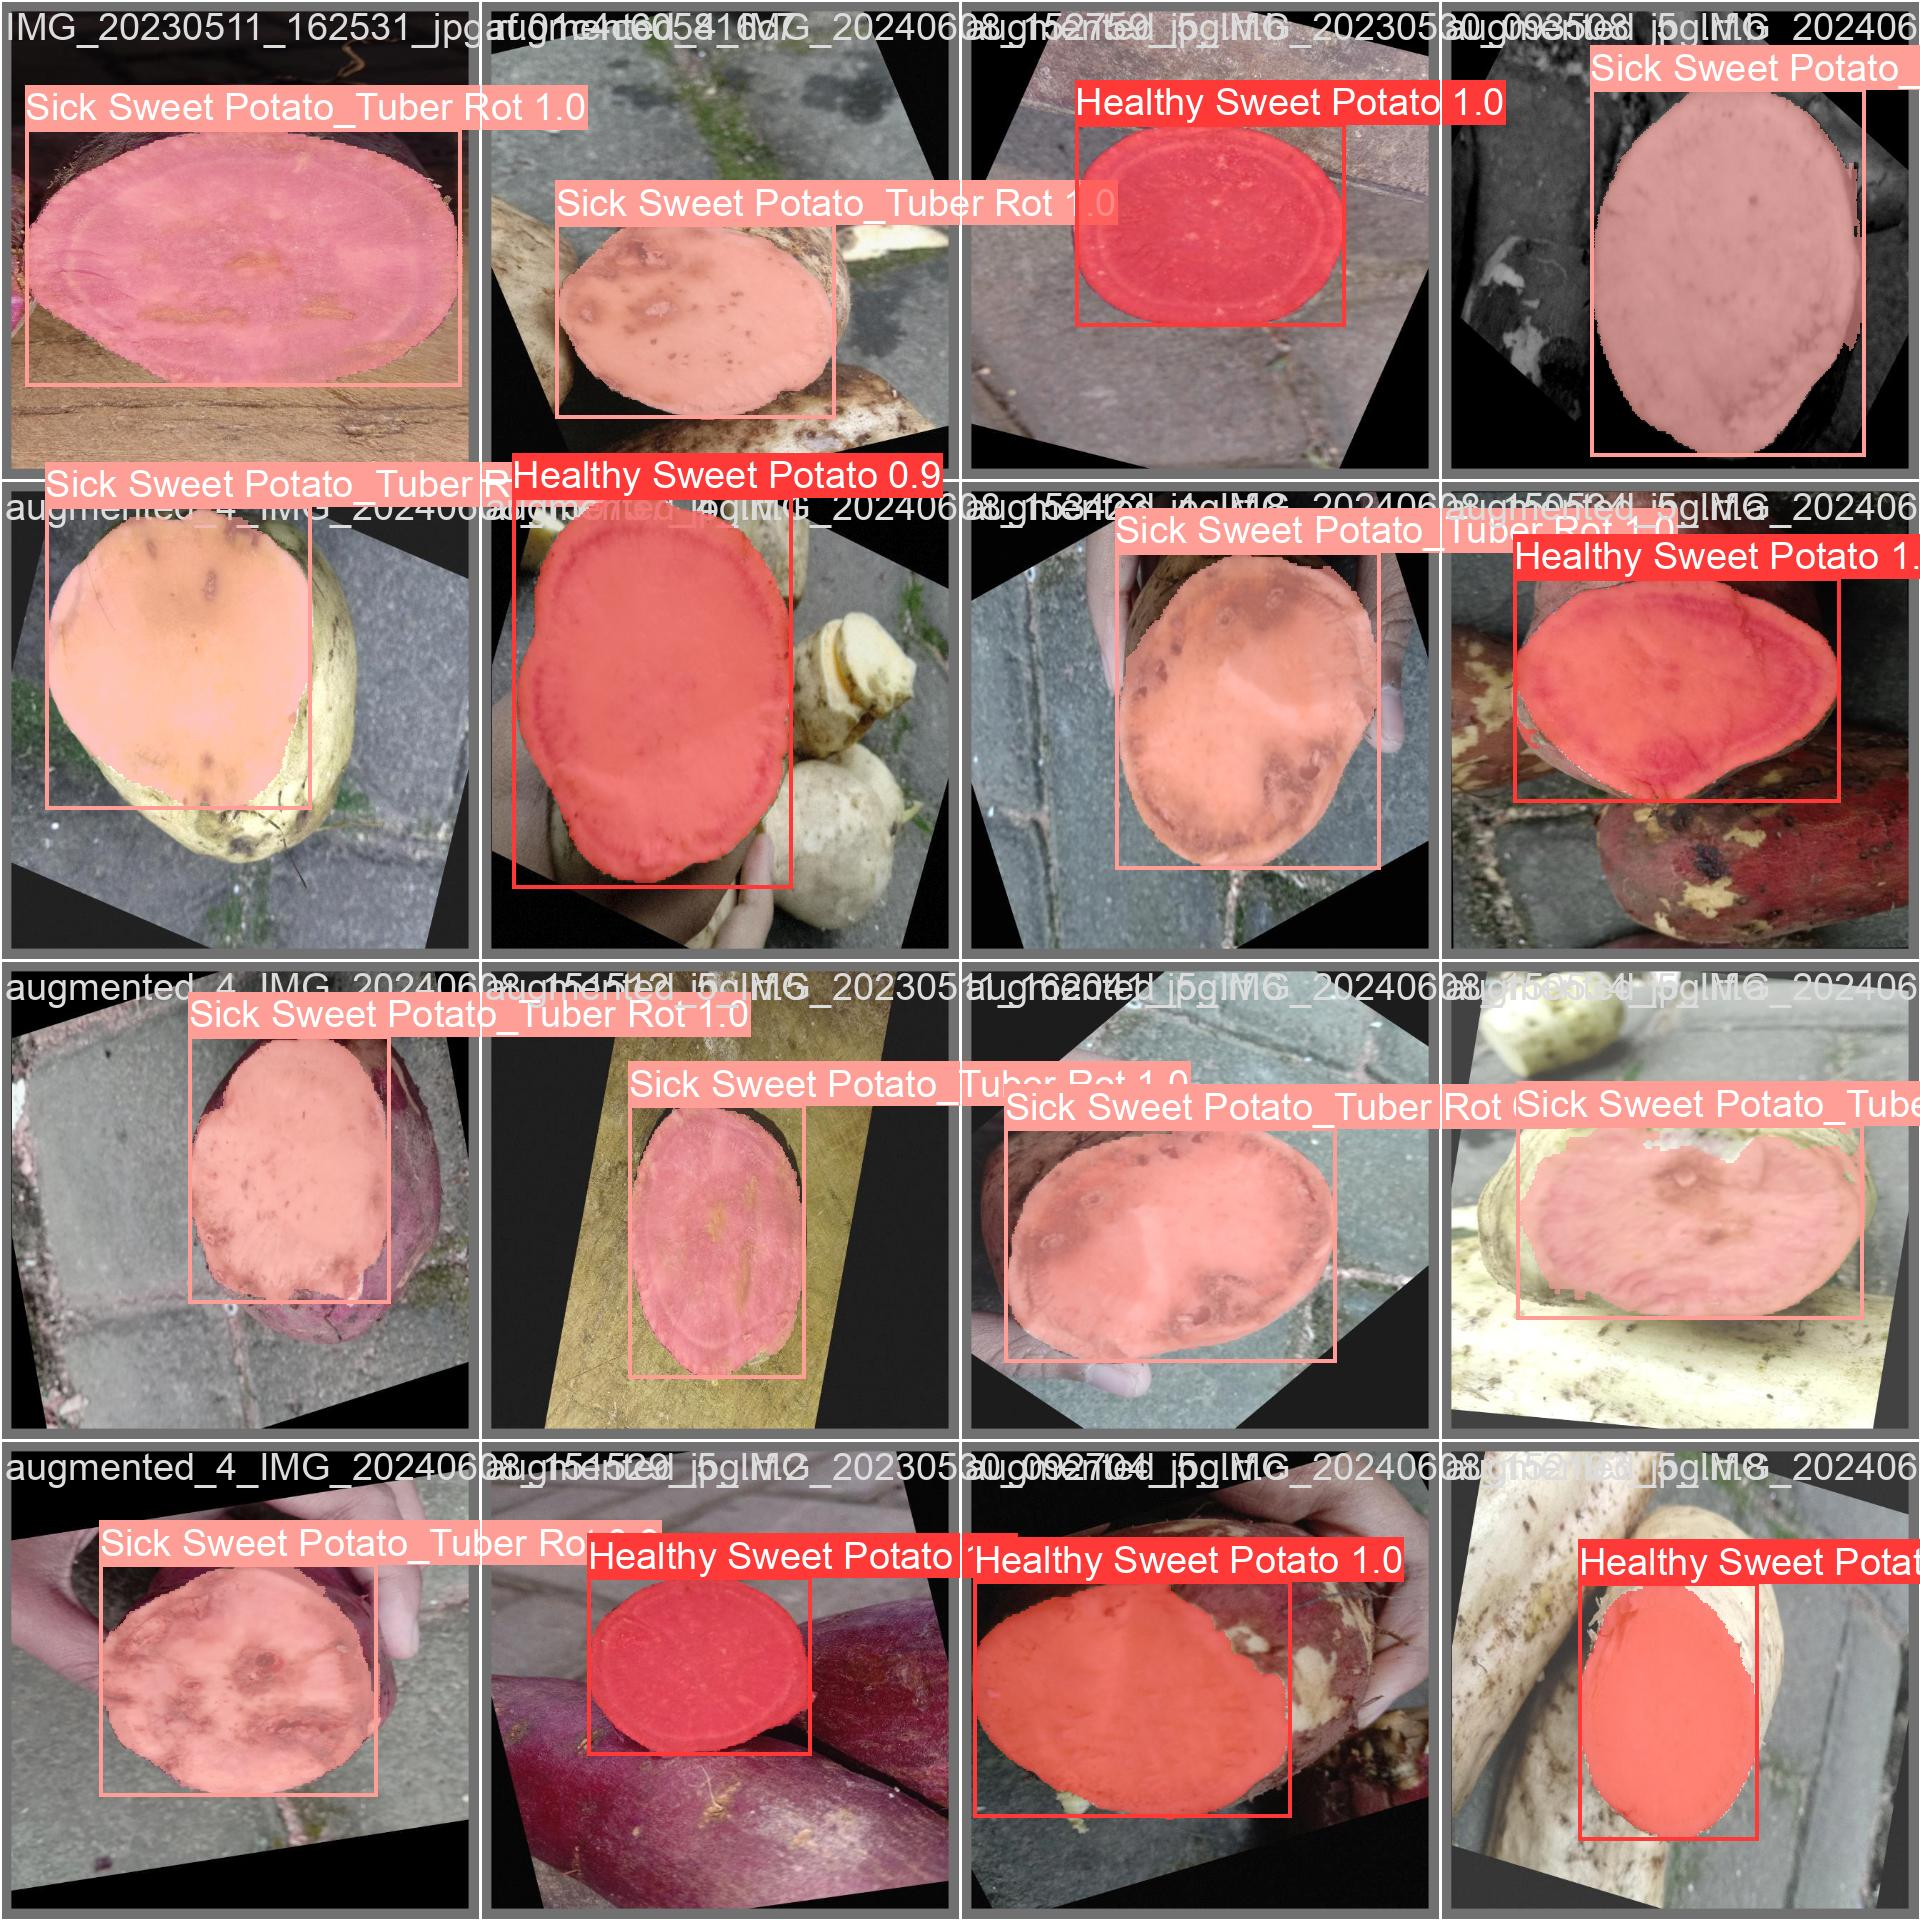

In [ ]:
Image(filename=f'runs/segment/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd Skripsi

!yolo task=segment mode=val model=runs/segment/train2/weights/best.pt data=SP1/data.yaml

[Errno 2] No such file or directory: 'Skripsi'
/content/drive/My Drive/Skripsi
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/Skripsi/SP1/valid/labels.cache... 178 images, 0 backgrounds, 0 corrupt: 100% 178/178 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 12/12 [00:09<00:00,  1.23it/s]
                   all        178        178      0.993      0.993      0.994      0.957      0.993      0.993      0.994      0.961
  Healthy Sweet Potato        178         94      0.997      0.989      0.995      0.974      0.997      0.989      0.995      0.977
Sick Sweet Potato_Tuber Rot        178         84      0.988      0.998      0.993      0.941      0.988      0.998      0.993      0.945
Speed: 4.0ms preprocess, 13.9ms i

## Inference with Custom Model

In [ ]:
%cd Skripsi
!yolo task=segment mode=predict model=runs/segment/train2/weights/best.pt conf=0.25 source=SP1/test/images save=true

[Errno 2] No such file or directory: 'Skripsi'
/content/drive/My Drive/Skripsi
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1423 /content/drive/MyDrive/Skripsi/SP1/test/images/IMG_20230511_162041_jpg.rf.0ea7482df5ea9d4e2eaaa0c96e906a1a.jpg: 640x640 1 Sick Sweet Potato_Tuber Rot, 20.9ms
image 2/1423 /content/drive/MyDrive/Skripsi/SP1/test/images/IMG_20230511_162041_jpg.rf.8779466943701c11b8ee1ce14f19ccb7.jpg: 640x640 1 Sick Sweet Potato_Tuber Rot, 21.0ms
image 3/1423 /content/drive/MyDrive/Skripsi/SP1/test/images/IMG_20230511_162041_jpg.rf.ff9d072b2f0ef2fc2983e7f5692deacc.jpg: 640x640 2 Sick Sweet Potato_Tuber Rots, 21.0ms
image 4/1423 /content/drive/MyDrive/Skripsi/SP1/test/images/IMG_20230511_162106_jpg.rf.ad2dd2ee42153ce86202a1d2a0818929.jpg: 640x640 1 Sick Sweet Potato_Tuber Rot, 20.9ms
image 5/1423 /cont

In [ ]:
%cd Skripsi

[Errno 2] No such file or directory: 'Skripsi'
/content/drive/My Drive/Skripsi


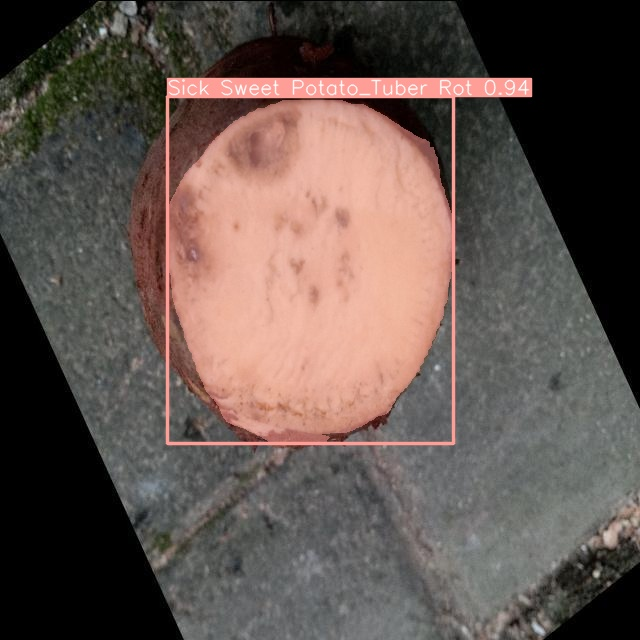

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict2/augmented_14_IMG_20240608_151456_jpg.rf.c39db2f8b33f35bba64e896051ff7d5f.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

# Deploy Your Model to the Edge

![Roboflow Inference banner](https://blog.roboflow.com/content/images/2023/08/banner.png)

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv8 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv8. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.

In [ ]:
import supervision as sv
from ultralytics import YOLO

dataset = sv.DetectionDataset.from_yolo(...)

model = YOLO(...)
def callback(image: np.ndarray) -> sv.Detections:
    result = model(image)[0]
    return sv.Detections.from_ultralytics(result)

confusion_matrix = sv.ConfusionMatrix.benchmark(
   dataset = dataset,
   callback = callback
)

confusion_matrix.plot()